In [2]:
pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/16/dd/1bf10180ba812afa1aa7427466083d731bc37b9a1157ec929d0cfeef87eb/torch-2.1.0-cp311-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/5e/5d/97afbafd9d584ff1b45fcb354a479a3609bd97f912f8f1f6c563cb1fae21/filelock-3.12.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 21.6 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/f6/eb/5585c96636bbb2755865c31d83a19dd220ef88e716df4659dacb86e009cc/networkx-3.2-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/e8/f6/3eccfb530aac90ad1301c582da228e4763f19e719ac8200752a4841b0b2d/fsspec-2023.10.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 12.1 MB/s eta 0:00:0000:01
   ━━━━━━━━

In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/22/50/1e211cbb5e1f52e55eeae1605789c9d24403962d37581cf0deb3e6b33377/tensorflow-2.14.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/c3/99/570fedd40048daeb04d4738ed4f1d0e77259fb631387f7f188aac3d85c31/h5py-3.10.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for libclang>

In [5]:
pip install neural_ode

ERROR: Could not find a version that satisfies the requirement neural_ode (from versions: none)
ERROR: No matching distribution found for neural_ode
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torchdiffeq

  Obtaining dependency information for scipy>=1.4.0 from https://files.pythonhosted.org/packages/b1/a6/b6d66d4f4045ba59200d25f254ccd63340162c903f95231e3ae6863fc4ae/scipy-1.11.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 9.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import matplotlib.pyplot as plt
from torchdiffeq import odeint

In [8]:
import numpy as np

Simulating Patch Clamped Hodgkin Huxley

In [22]:
# Hodgkin-Huxley model parameters
C_m = 1.0  # membrane capacitance (uF/cm^2)
g_Na = 120.0  # maximum sodium conductance (mS/cm^2)
g_K = 36.0  # maximum potassium conductance (mS/cm^2)
g_L = 0.3  # leak conductance (mS/cm^2)
E_Na = 50.0  # sodium reversal potential (mV)
E_K = -77.0  # potassium reversal potential (mV)
E_L = -54.387  # leak reversal potential (mV)

# Time parameters
t_start = 0
t_end = 50  # simulation time (ms)
dt = 0.01  # time step (ms)
num_steps = int((t_end - t_start) / dt) + 1

# Initialize arrays to store results
t = np.linspace(t_start, t_end, num_steps)
V = np.zeros(num_steps)
m = np.zeros(num_steps)
h = np.zeros(num_steps)
n = np.zeros(num_steps)



In [19]:
# Initial conditions
V[0] = -65.0  # Initial membrane potential (mV)
m[0], h[0], n[0] = 0.05, 0.6, 0.32  # Initial gating variables

# Current injection function for path-clamping
def current_injection(t):
    if 5 <= t <= 10:
        return 20.0  # Inject a current of 20 uA/cm^2 between 5 ms and 10 ms
    else:
        return 0.0



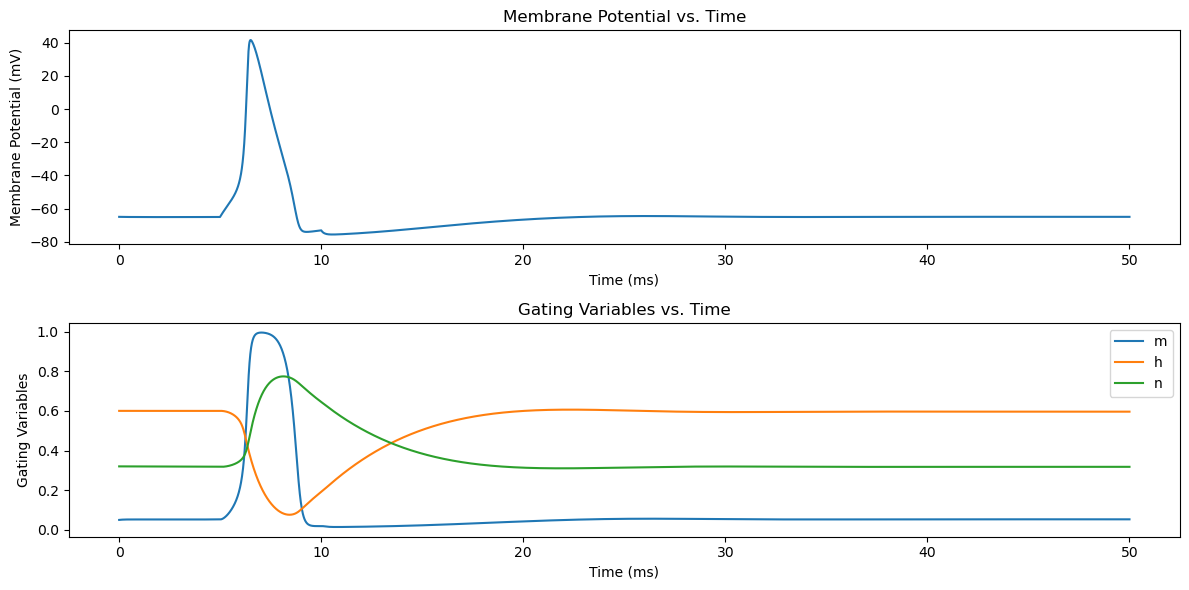

In [20]:
# Simulation loop
for i in range(1, num_steps):
    I_inj = current_injection(t[i])
    
    alpha_m = 0.1 * (V[i-1] + 40) / (1.0 - np.exp(-0.1 * (V[i-1] + 40.0)))
    beta_m = 4.0 * np.exp(-(V[i-1] + 65.0) / 18.0)
    alpha_h = 0.07 * np.exp(-0.05 * (V[i-1] + 65.0))
    beta_h = 1.0 / (1.0 + np.exp(-0.1 * (V[i-1] + 35.0)))
    alpha_n = 0.01 * (V[i-1] + 55.0) / (1.0 - np.exp(-0.1 * (V[i-1] + 55.0)))
    beta_n = 0.125 * np.exp(-(V[i-1] + 65) / 80.0)

    dVdt = (I_inj - g_Na * m[i-1]**3 * h[i-1] * (V[i-1] - E_Na) - g_K * n[i-1]**4 * (V[i-1] - E_K) - g_L * (V[i-1] - E_L)) / C_m
    dmdt = alpha_m * (1 - m[i-1]) - beta_m * m[i-1]
    dhdt = alpha_h * (1 - h[i-1]) - beta_h * h[i-1]
    dndt = alpha_n * (1 - n[i-1]) - beta_n * n[i-1]

    V[i] = V[i-1] + dt * dVdt
    m[i] = m[i-1] + dt * dmdt
    h[i] = h[i-1] + dt * dhdt
    n[i] = n[i-1] + dt * dndt

# Create plots
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potential vs. Time')

plt.subplot(2, 1, 2)
plt.plot(t, m, label='m')
plt.plot(t, h, label='h')
plt.plot(t, n, label='n')
plt.xlabel('Time (ms)')
plt.ylabel('Gating Variables')
plt.title('Gating Variables vs. Time')
plt.legend()

plt.tight_layout()
plt.show()

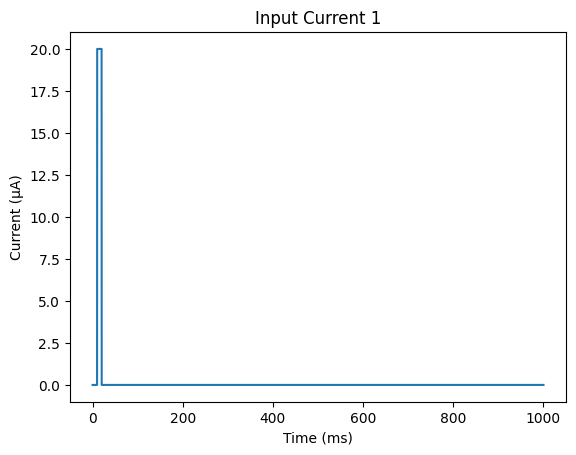

ValueError: x and y must have same first dimension, but have shapes (100000,) and (20000,)

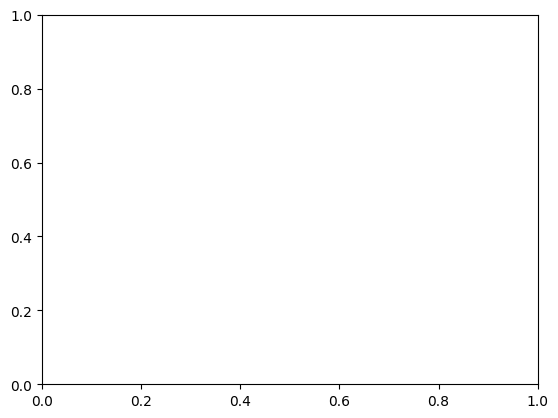

In [13]:
import numpy as np

# Define parameters for the input currents
num_samples = 100  # Number of input current samples
duration = 10.0  # Duration of each current pulse (in milliseconds)
pulse_amplitude = 20.0  # Amplitude of the current pulse (in microamperes, μA)
inter_pulse_interval = 20.0  # Interval between pulses (in milliseconds)

# Time points for the simulation
time = np.linspace(0, duration * num_samples, num_samples * 1000)  # High-resolution time grid

# Create a list of reasonable input currents
input_currents = []

for _ in range(num_samples):
    # Generate a single pulse of current
    current_pulse = np.zeros(len(time))
    current_pulse[1000:2000] = pulse_amplitude  # Apply a pulse for the specified duration

    # Append the current pulse to the list
    input_currents.append(current_pulse)

    # Add an interval of zero current (inter-pulse interval)
    zero_current = np.zeros(int(inter_pulse_interval * 1000))
    input_currents.append(zero_current)

# Convert the list of input currents to a NumPy array
input_currents = np.asarray(input_currents, dtype="object")

# Plot an example of the input currents
import matplotlib.pyplot as plt

for i, current_pulse in enumerate(input_currents):
    plt.figure()
    plt.plot(time, current_pulse)
    plt.title(f"Input Current {i + 1}")
    plt.xlabel("Time (ms)")
    plt.ylabel("Current (μA)")
    plt.show()


In [23]:
def alpha_m(V):
    alpha_m = 0.1 * (V + 40) / (1.0 - tf.exp(-0.1 * (V + 40.0)))
    return alpha_m
def beta_m(V): 
    beta_m = 4.0 * tf.exp(-(V + 65.0) / 18.0)
    return beta_m
def alpha_h(V):
    alpha_h = 0.07 * tf.exp(-0.05 * (V + 65.0))
    return alpha_h
def beta_h(V):
    beta_h = 1.0 / (1.0 + np.exp(-0.1 * (V + 35.0)))
    return beta_h
def alpha_n(V):
    alpha_n = 0.01 * (V + 55.0) / (1.0 - np.exp(-0.1 * (V + 55.0)))
    return alpha_n
def beta_n(V):
    beta_n = 0.125 * np.exp(-(V + 65) / 80.0)
    return beta_n


def hodgkin_huxley_eq(V, m, h, n, I):
    dVdt = (I - g_Na * m**3 * h * (V - E_Na) - g_K * n**4 * (V - E_K) - g_L * (V - E_L)) / C_m
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    return dVdt, dmdt, dhdt, dndt
    
def simulate_hodgkin_huxley(input_currents, time_points, parameters):
    """
    Simulate the Hodgkin-Huxley model for multiple input currents.

    Args:
    - input_currents (list of numpy arrays): List of input currents.
    - time_points (numpy array): Time points at which to record the membrane voltage.
    - parameters (dict): Dictionary of Hodgkin-Huxley model parameters.

    Returns:
    - target_voltages (list of numpy arrays): List of target voltages corresponding to each input current.
    """

    target_voltages = []

    for current in input_currents:
        # Initial conditions
        V = -65.0
        m = alpha_m(V) / (alpha_m(V) + beta_m(V))
        h = alpha_h(V) / (alpha_h(V) + beta_h(V))
        n = alpha_n(V) / (alpha_n(V) + beta_n(V))

        voltage_trace = []

        for t in time_points:
            # Record the membrane voltage at each time point
            voltage_trace.append(V)

            # Numerical integration using Euler's method
            dV, dm, dh, dn = hodgkin_huxley_eq(V, m, h, n, current)
            V += dV * dt
            m += dm * dt
            h += dh * dt
            n += dn * dt

        target_voltages.append(np.array(voltage_trace))

    return target_voltages

# Usage example
input_currents = [np.array([0, 1.0, ...])]
time_points = np.linspace(0, 10, num=1000)
parameters = {
    'g_Na': 120.0,
    'g_K': 36.0,
    'g_L': 0.3,
    'E_Na': 50.0,
    'E_K': -77.0,
    'E_L': -55.0,
    'C_m': 1.0,
}
target_voltages = simulate_hodgkin_huxley(input_currents, time_points, parameters)

TypeError: float() argument must be a string or a real number, not 'ellipsis'

Let's train a NN to approximate the code of this Hodgkin Huxley.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_dim = len(time_points) 

model = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Output layer for membrane voltage
])

model.compile(optimizer='adam', loss='mse')
model.fit(input_currents, target_voltages, epochs=num_epochs, batch_size=batch_size)


2023-10-27 09:19:10.979818: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'input_dim' is not defined

In [25]:
pip install neuron


  Obtaining dependency information for neuron from https://files.pythonhosted.org/packages/35/c9/14f2459761aba3bd5452dc3910c4a0906aef5be2acea5b159ebf47278ee8/NEURON-8.2.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 9.6 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
import neuron 
from neuron import h, rxd
from neuron.units import ms, mV

In [29]:
soma = h.Section(name='soma')
h.topology()


|-|       soma(0-1)



1.0

In [30]:
soma.psection()

{'point_processes': {},
 'density_mechs': {},
 'ions': {},
 'morphology': {'L': 100.0,
  'diam': [500.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x7fe9dff9e060',
 'cell': None}

In [31]:
soma.L = 18.8
soma.diam = 18.8


In [32]:
soma.insert('hh')

soma

In [33]:
print("type(soma) = {}".format(type(soma)))
print("type(soma(0.5)) = {}".format(type(soma(0.5))))

type(soma) = <class 'nrn.Section'>
type(soma(0.5)) = <class 'nrn.Segment'>


In [34]:
mech = soma(0.5).hh


In [35]:
iclamp = h.IClamp(soma(0.5))

In [42]:
pip install bokeh

  Obtaining dependency information for bokeh from https://files.pythonhosted.org/packages/d8/7b/74b234af7fca8c688c46f63fec30665b0c3c1f3eac2da756306691aee122/bokeh-3.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices>=2021.09.1 from https://files.pythonhosted.org/packages/82/c3/e06dfa46464cce3eda4b86df8847cab99d9bc545c76807ee689545187a4c/xyzservices-2023.10.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 6.3 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 1.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
iclamp.delay = 2
iclamp.dur = 0.1
iclamp.amp = 0.9
soma.psection()


{'point_processes': {'IClamp': {IClamp[0]}},
 'density_mechs': {'hh': {'gnabar': [0.12],
   'gkbar': [0.036],
   'gl': [0.0003],
   'el': [-54.3],
   'gna': [0.0],
   'gk': [0.0],
   'il': [0.0],
   'minf': [0.0],
   'hinf': [0.0],
   'ninf': [0.0],
   'mtau': [0.0],
   'htau': [0.0],
   'ntau': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 18.8,
  'diam': [18.8],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x7fe9dff9e060',
 'cell': None}

In [37]:
v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t = h.Vector().record(h._ref_t)                     # Time stamp vector


In [38]:
h.load_file('stdrun.hoc')

1.0

In [39]:
h.finitialize(-65 * mV)


1.0

In [40]:
h.continuerun(40 * ms)

0.0

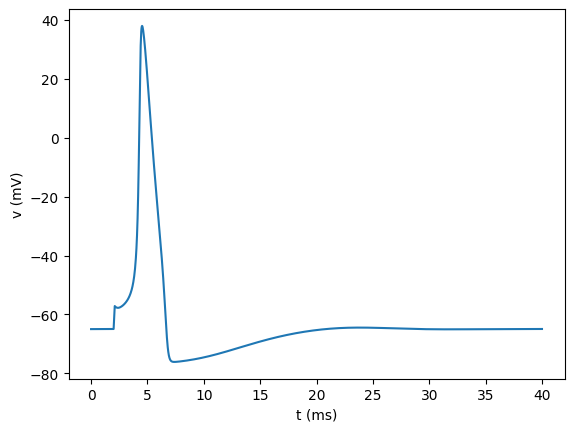

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(t, v)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.show()